In [2]:
import tensorflow as tf
from tensorflow import keras
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as display
from PIL import Image 

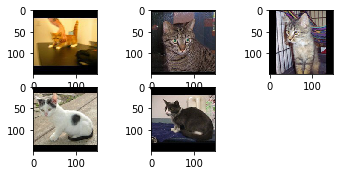

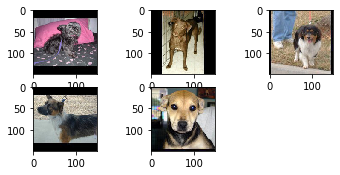

In [3]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataframe
path='train1000/'
# plot first few images
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename= path + "cat." + str(i) + ".jpg"
    # load image pixels
    image= imread(filename)
    #  plot row image data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# The same step for dogs
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename= path + "dog." + str(i) + ".jpg"
    # load image pixels
    image= imread(filename)
    #  plot row image data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [4]:
# All photos have diffrent size
# Let`s do them 150*150 pixels
from os import listdir
from numpy import asarray
from numpy import save
#conda install PIL     # Installed through the terminal
#conda install Pillow  # Installed through the terminal
from keras_preprocessing.image import load_img, img_to_array
from keras_preprocessing import image
from PIL import Image
import os, sys
import shutil 

# Resize images

from shutil import copyfile

path = "train1000/"
dirs = os.listdir( path )
final_size = 150;

def resize_aspect_fit():
    for item in dirs:
         if item == '.DS_Store':
             continue
         if os.path.isfile(path+item):
             im = Image.open(path+item)
             f, e = os.path.splitext(path+item)
             size = im.size
             ratio = float(final_size) / max(size)
             new_image_size = tuple([int(x*ratio) for x in size])
             im = im.resize(new_image_size, Image.ANTIALIAS)
             new_im = Image.new("RGB", (final_size, final_size))
             new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
             new_im.save(f + '.jpg', 'JPEG', quality=90)
resize_aspect_fit()

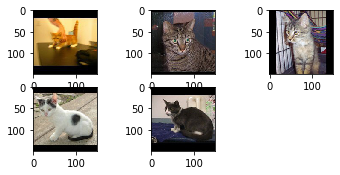

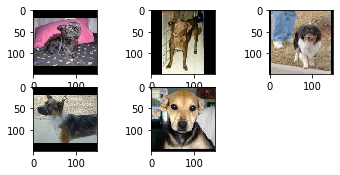

In [5]:
# Check that photo's size is 150*150 pixels
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename= path + "cat." + str(i) + ".jpg"
    # load image pixels
    image= imread(filename)
    #  plot row image data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# The same step for dogs
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename= path + "dog." + str(i) + ".jpg"
    # load image pixels
    image= imread(filename)
    #  plot row image data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [6]:
# Check a new photos size
for i in range(5):
    cats=Image.open(os.path.join(path + "cat." + str(i) + ".jpg"))
    
    width, height = cats.size
    print(width, height)
print(end='\n')
    
for i in range(5):
    dogs=Image.open(os.path.join(path + "dog." + str(i) + ".jpg"))
    
    width_dogs, height_dogs = dogs.size
    print(width_dogs, height_dogs)

150 150
150 150
150 150
150 150
150 150

150 150
150 150
150 150
150 150
150 150


In [7]:
#Creating directories like that
#data
#├── test
#│   ├── cats
#│   └── dogs
#└── train
#    ├── cats
#    └── dogs


from os import makedirs
dataset_home = 'data/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

In [8]:
# Put resized images (train data) into "data/train/cats/" and "data/train/dogs/"
import glob
import shutil
import os
import random
from shutil import copyfile
from random import seed
from random import random
# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.25

dataset_home = "data/"

# copy training dataset images into subdirectories
src_directory = 'train1000/'
for file in listdir(src_directory):
    src = src_directory + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [9]:
# See the folder
print(next( os.walk(dataset_home)))
print(next( os.walk('data/test')))
print(next( os.walk('data/train')))

('data/', ['train', 'test'], [])
('data/test', ['dogs', 'cats'], [])
('data/train', ['dogs', 'cats'], [])


In [10]:
train_dir= os.path.join(dataset_home, 'train')
test_dir = os.path.join(dataset_home,'test')

train_dir_cats = os.path.join(train_dir, "cats")
train_dir_dogs = os.path.join(train_dir, "dogs")

test_dir_cats = os.path.join(test_dir, "cats")
test_dir_dogs = os.path.join(test_dir, "dogs")

In [11]:
amount_train_dir_cats = len(os.listdir(train_dir_cats))
amount_train_dir_dogs = len(os.listdir(train_dir_dogs))

amount_test_dir_cats = len(os.listdir(test_dir_cats))
amount_test_dir_dogs = len(os.listdir(test_dir_dogs))

sum_amount_train_dir = amount_train_dir_cats + amount_train_dir_dogs
sum_amount_test_dir = amount_test_dir_cats + amount_test_dir_dogs

print('Cats amount in train data:', amount_train_dir_cats)
print('Dogs amount in train data:', amount_train_dir_dogs)
print('Cats amount in test data:', amount_test_dir_cats)
print('Dogs amount in test data:', amount_test_dir_dogs)
print('Total train data: ', sum_amount_train_dir)
print('Total test data:', sum_amount_test_dir)
print('Total number of images:', sum_amount_train_dir + sum_amount_test_dir)

Cats amount in train data: 761
Dogs amount in train data: 757
Cats amount in test data: 239
Dogs amount in test data: 243
Total train data:  1518
Total test data: 482
Total number of images: 2000


In [12]:
#from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

In [13]:
# The number of training images before to process before updating the model parametrs
# I have small data with 1518 training examples, batch size =32 is is fit

batch_size = 32 
# demension
IMAGE_SHAPE = 150

In [14]:
# Data preprosessing
from keras_preprocessing.image import ImageDataGenerator
#Generator for train data
train_generator = ImageDataGenerator(rescale = 1./255) 
# Generator for test data
test_generator = ImageDataGenerator(rescale = 1./255)

datagen_train = train_generator.flow_from_directory(batch_size = batch_size, directory = train_dir, 
                 target_size= (IMAGE_SHAPE, IMAGE_SHAPE), class_mode = "binary") 

datagen_test = test_generator.flow_from_directory(batch_size = batch_size, directory = test_dir,  
                 target_size= (IMAGE_SHAPE, IMAGE_SHAPE), class_mode = "binary") 

Found 1518 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
    
]) 

In [16]:
from tensorflow.keras import optimizers
opt=optimizers.SGD(lr=0.001, momentum =0.9)
model.compile(optimizer= opt, loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
import numpy
steps_per_epoch = tf.math.ceil(sum_amount_train_dir/batch_size).numpy()
steps_per_epoch

48.0

In [18]:
test_steps = tf.math.ceil(sum_amount_test_dir/batch_size).numpy()
test_steps

16.0

In [19]:
model.fit_generator(
    datagen_train,
    validation_data = datagen_test, 
    steps_per_epoch=steps_per_epoch,
    epochs = 10,
    validation_steps=test_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 48.0 steps, validate for 16.0 steps
Epoch 1/10
48/48 [==============================] - 92s 2s/step - loss: 0.6935 - accuracy: 0.4941 - val_loss: 0.6920 - val_accuracy: 0.5207
Epoch 2/10
48/48 [==============================] - 86s 2s/step - loss: 0.6904 - accuracy: 0.5244 - val_loss: 0.6899 - val_accuracy: 0.5394
Epoch 3/10
48/48 [==============================] - 86s 2s/step - loss: 0.6883 - accuracy: 0.5896 - val_loss: 0.6882 - val_accuracy: 0.5871
Epoch 4/10
48/48 [==============================] - 87s 2s/step - loss: 0.6863 - accuracy: 0.6067 - val_loss: 0.6862 - val_accuracy: 0.5581
Epoch 5/10
48/48 [==============================] - 87s 2s/step - loss: 0.6841 - accuracy: 0.5975 - val_loss: 0.6842 - val_accuracy: 0.5913
Epoch 6/10
48/48 [==============================] - 104s 2s/step - loss: 0.6822 - accuracy: 0.5830 - val_loss: 0.6847 - val_accu